# Tier 1 Grouping Analysis

## Setup Instructions

### 1. Create Virtual Environment
```bash
# Create virtual environment
python -m venv tier-1-venv

# Activate virtual environment
# On macOS/Linux:
source tier-1-venv/bin/activate
# On Windows:
# tier-1-venv\Scripts\activate
```

### 2. Install Dependencies
```bash
# Make sure virtual environment is activated
pip install -r requirements.txt
```

### 3. Create .env File
Create a `.env` file in the project root with your database credentials:

```env
DB_USER=your_username
DB_PASSWORD=your_password
DB_HOST=wg-data-rds.data.higg.org
DB_PORT=5432
DB_NAME=db_higg
```

**⚠️ Important:** Replace the placeholder values with your actual database credentials.

### 4. Start Jupyter
```bash
# Make sure virtual environment is activated
source tier-1-venv/bin/activate

# Start Jupyter
jupyter notebook
# or
jupyter lab
```

### 5. Select Kernel
- Open this notebook
- Select **"Tier 1 Analysis"** as your kernel
- Run the cells in order

## Security Notes
- **Never commit** the `.env` file to version control
- **Keep credentials secure** and don't share them
- **Use different credentials** for different environments (dev/staging/prod)

## Troubleshooting
- **Connection issues**: Verify your database credentials in `.env`
- **Kernel not found**: Make sure you've activated the virtual environment
- **Package errors**: Run `pip install -r requirements.txt` again

In [12]:
# Setup: Import libraries, load environment variables, and configure SQL file
import pandas as pd
import psycopg2
from sqlalchemy import create_engine, text
import os
from dotenv import load_dotenv

# Load environment variables
load_dotenv()

# Configuration: SQL file to execute
SQL_FILE = 'queries/facility type and pc.sql'  # Change this to run a different SQL file

# Create connection string
DB_USER = os.getenv('DB_USER')
DB_PASSWORD = os.getenv('DB_PASSWORD')
DB_HOST = os.getenv('DB_HOST')
DB_PORT = os.getenv('DB_PORT')
DB_NAME = os.getenv('DB_NAME')

connection_string = f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}@{DB_HOST}:{DB_PORT}/{DB_NAME}"

print(f"✅ Connected to: {DB_HOST}:{DB_PORT}/{DB_NAME}")
print(f"📁 SQL file to execute: {SQL_FILE}")
print("✅ Environment variables loaded successfully!")

✅ Connected to: wg-data-rds.data.higg.org:5432/db_higg
📁 SQL file to execute: queries/facility type and pc.sql
✅ Environment variables loaded successfully!


In [13]:
# Create database engine and test connection
print("🔧 Creating database engine...")

try:
    # Create engine with optimized settings
    engine = create_engine(
        connection_string,
        pool_pre_ping=True,
        pool_recycle=300,
        echo=False
    )
    
    # Test connection
    with engine.connect() as connection:
        result = connection.execute(text("SELECT 'Connection successful!' as status, current_timestamp as time"))
        row = result.fetchone()
        
    print("✅ DATABASE CONNECTION SUCCESSFUL!")
    print(f"Status: {row[0]}")
    print(f"Connected at: {row[1]}")
    
except Exception as e:
    print("❌ DATABASE CONNECTION FAILED!")
    print(f"Error: {e}")
    print("\n🔧 Check your .env file credentials")

🔧 Creating database engine...
✅ DATABASE CONNECTION SUCCESSFUL!
Status: Connection successful!
Connected at: 2025-09-24 17:47:05.129419+00:00


In [14]:
# Execute your SQL file
print(f"📁 Loading and executing SQL file: {SQL_FILE}")

try:
    # Read SQL file using the configured variable
    with open(SQL_FILE, 'r') as file:
        sql_query = file.read()
    
    print(f"✅ SQL file loaded ({len(sql_query)} characters)")
    
    # Execute query using manual method
    with engine.connect() as connection:
        result = connection.execute(text(sql_query))
        rows = result.fetchall()
        columns = result.keys()
        
    # Create DataFrame
    df_results = pd.DataFrame(rows, columns=columns)
    
    print("✅ QUERY EXECUTED SUCCESSFULLY!")
    print(f"📊 Results: {df_results.shape[0]} rows, {df_results.shape[1]} columns")
    print(f"📋 Columns: {list(df_results.columns)}")
    
except FileNotFoundError:
    print(f"❌ SQL FILE NOT FOUND: {SQL_FILE}")
    print("🔧 Make sure the file exists in the current directory")
    print("💡 You can change the SQL_FILE variable in Cell 2 to point to a different file")
    
except Exception as e:
    print(f"❌ QUERY EXECUTION FAILED: {e}")
    print(f"\n🔍 SQL Query content from {SQL_FILE}:")
    print("=" * 50)
    print(sql_query)
    print("=" * 50)

📁 Loading and executing SQL file: queries/facility type and pc.sql
✅ SQL file loaded (2406 characters)
✅ QUERY EXECUTED SUCCESSFULLY!
📊 Results: 5624 rows, 8 columns
📋 Columns: ['assessment_id', 'rfi_pid', 'finished_product_assembly_prod_vol_pcs', 'sipfacilityapparelpc', 'apparel_pc_count', 'total_energy_mj', 'totalghgemissions', 'energy_outlier']


In [15]:
# Display and analyze results
if 'df_results' in locals() and not df_results.empty:
    print("📊 Dataset Overview:")
    print(f"   • Total rows: {len(df_results)}")
    print(f"   • Total columns: {len(df_results.columns)}")
    
    print("\n📋 Column Information:")
    for col in df_results.columns:
        dtype = df_results[col].dtype
        non_null = df_results[col].count()
        print(f"   • {col}: {dtype} ({non_null} non-null)")
    
    print("\n📄 First 10 rows:")
    print(df_results.head(10))
    
    print("\n💾 To save results:")
    print("df_results.to_csv('tier1_results.csv', index=False)")
    
else:
    print("❌ No results available. Run the previous cell first.")

📊 Dataset Overview:
   • Total rows: 5624
   • Total columns: 8

📋 Column Information:
   • assessment_id: object (5624 non-null)
   • rfi_pid: object (5624 non-null)
   • finished_product_assembly_prod_vol_pcs: object (5624 non-null)
   • sipfacilityapparelpc: object (5624 non-null)
   • apparel_pc_count: int64 (5624 non-null)
   • total_energy_mj: object (5624 non-null)
   • totalghgemissions: object (5624 non-null)
   • energy_outlier: bool (5624 non-null)

📄 First 10 rows:
                                    assessment_id  rfi_pid  \
0  femsurvey:fffff92a-914f-446f-812f-8141dbe416a6  fem2024   
1  femsurvey:ffff536a-d061-4fbd-84af-bfcaf59ac297  fem2024   
2  femsurvey:fff81b83-f145-404b-aeae-d0bb63b0fa1a  fem2024   
3  femsurvey:fff4757f-0b72-4f89-82cb-771a86980e0f  fem2024   
4  femsurvey:ffe917d7-0bf2-4469-af77-cba73a34e513  fem2024   
5  femsurvey:ffe53b8f-d79c-4480-a52f-92f026b318d2  fem2024   
6  femsurvey:ffba25e8-eaea-486e-9abf-6e362be0f88d  fem2024   
7  femsurvey:ffa679a1-

In [16]:
# Load PIC default product weights for apparel categories
print("📁 Loading PIC default product weights...")

try:
    # Load the CSV file (comma-separated)
    weights_df = pd.read_csv('PIC default product weights.csv')
    
    print("✅ PIC default product weights loaded successfully!")
    print(f"📊 Weights data: {weights_df.shape[0]} rows, {weights_df.shape[1]} columns")
    print(f"📋 Columns: {list(weights_df.columns)}")
    
    # Display the weights data (only FEM Apparel PC and Product Weight columns)
    print("\n📄 PIC Default Product Weights:")
    display_df = weights_df[['FEM Apparel PC', 'Product Weight (kg)']]
    print(display_df)
    
    # Create a dictionary mapping for easy lookup
    apparel_weights = dict(zip(weights_df['FEM Apparel PC'], weights_df['Product Weight (kg)']))
    
    print(f"\n🔗 Created weight mapping for {len(apparel_weights)} apparel categories:")
    for category, weight in apparel_weights.items():
        print(f"   • {category}: {weight} kg")
     
except FileNotFoundError:
    print("❌ PIC default product weights.csv file not found!")
    print("🔧 Make sure the file exists in the current directory")
    
except Exception as e:
    print(f"❌ Error loading weights file: {e}")

📁 Loading PIC default product weights...
✅ PIC default product weights loaded successfully!
📊 Weights data: 14 rows, 3 columns
📋 Columns: ['FEM Apparel PC', 'PIC Product', 'Product Weight (kg)']

📄 PIC Default Product Weights:
       FEM Apparel PC  Product Weight (kg)
0              Shirts             0.250000
1             Dresses             0.374213
2             Jackets             0.950000
3               Pants             0.453592
4              Skirts             0.290299
5               Socks             0.040000
6            Sweaters             0.550000
7           Swimsuits             0.100000
8          Baselayers             0.111130
9             Hosiery             0.227000
10  Leggings & Tights             0.227000
11            Jerseys             0.150000
12            T-shirt             0.150000
13          Underwear             0.138346

🔗 Created weight mapping for 14 apparel categories:
   • Shirts: 0.25 kg
   • Dresses: 0.3742134 kg
   • Jackets: 0.95 kg
   • 

In [17]:
# Calculate assumed average product weight for each assessment
print("⚖️ Calculating assumed average product weights...")

import ast  # For safely evaluating string representations of lists

def calculate_average_weight(apparel_pc_list, weights_dict):
    """
    Calculate average weight for a list of apparel product categories
    
    Args:
        apparel_pc_list: List of apparel categories (e.g., ["Shirts", "Pants"])
        weights_dict: Dictionary mapping apparel categories to weights
    
    Returns:
        Average weight in kg, or None if no valid categories found
    """
    try:
        # Handle both list and string inputs
        if isinstance(apparel_pc_list, str):
            # If it's a string, try to parse it as a list
            apparel_categories = ast.literal_eval(apparel_pc_list)
        else:
            # If it's already a list, use it directly
            apparel_categories = apparel_pc_list
        
        # Get weights for each category
        weights = []
        for category in apparel_categories:
            if category in weights_dict:
                weights.append(weights_dict[category])
            else:
                print(f"⚠️ Warning: Category '{category}' not found in weights dictionary")
        
        # Calculate average if we have valid weights
        if weights:
            return sum(weights) / len(weights)
        else:
            return None
            
    except (ValueError, SyntaxError) as e:
        print(f"⚠️ Warning: Could not parse apparel categories: {apparel_pc_list}")
        return None

# Apply the function to calculate average weights
if 'df_results' in locals() and not df_results.empty:
    print("📊 Calculating average weights for each assessment...")
    
    # Calculate average weights
    df_results['assumed_avg_product_weight_kg'] = df_results['sipfacilityapparelpc'].apply(
        lambda x: calculate_average_weight(x, apparel_weights)
    )
    
    # Convert production volume from pieces to kg using assumed average weight
    # Convert decimal values to float to avoid type mismatch
    df_results['estimated_production_volume_kg'] = (
        df_results['finished_product_assembly_prod_vol_pcs'].astype(float) * 
        df_results['assumed_avg_product_weight_kg']
    )
    
    # Add weight range category for each assessment
    def categorize_weight_range(weight):
        """Categorize weight into predefined ranges"""
        if pd.isna(weight):
            return "Unknown"
        elif 0 <= weight < 0.2:
            return "Very Light (0-0.2 kg)"
        elif 0.2 <= weight < 0.3:
            return "Light (0.2-0.3 kg)"
        elif 0.3 <= weight < 0.4:
            return "Medium-Light (0.3-0.4 kg)"
        elif 0.4 <= weight < 0.5:
            return "Medium (0.4-0.5 kg)"
        elif 0.5 <= weight < 0.6:
            return "Medium-Heavy (0.5-0.6 kg)"
        elif weight >= 0.6:
            return "Heavy (0.6+ kg)"
        else:
            return "Unknown"
    
    df_results['weight_range_category'] = df_results['assumed_avg_product_weight_kg'].apply(categorize_weight_range)
    
    # Check what columns are available and calculate normalized metrics
    print(f"📋 Available columns in df_results: {list(df_results.columns)}")
    
    # Helper function to find column with case-insensitive matching
    def find_column(df, target_name):
        """Find column name with case-insensitive matching"""
        target_lower = target_name.lower()
        for col in df.columns:
            if col.lower() == target_lower:
                return col
        return None
    
    # Calculate normalized energy and emissions per kg of production
    # Convert energy to float to avoid type issues
    energy_col = find_column(df_results, 'total_energy_mj')
    if energy_col:
        df_results['total_energy_mj'] = df_results[energy_col].astype(float)
        # Calculate energy intensity (MJ per kg)
        df_results['energy_intensity_mj_per_kg'] = (
            df_results['total_energy_mj'] / df_results['estimated_production_volume_kg']
        )
        print(f"✅ Found energy column: '{energy_col}'")
    else:
        print("⚠️ Warning: 'total_energy_mj' column not found in data")
        df_results['energy_intensity_mj_per_kg'] = None
    
    emissions_col = find_column(df_results, 'totalGHGemissions')
    if emissions_col:
        df_results['totalGHGemissions'] = df_results[emissions_col].astype(float)
        # Calculate emissions intensity (kgCO2e per kg)
        df_results['emissions_intensity_ghg_per_kg'] = (
            df_results['totalGHGemissions'] / df_results['estimated_production_volume_kg']
        )
        print(f"✅ Found emissions column: '{emissions_col}'")
    else:
        print("⚠️ Warning: 'totalGHGemissions' column not found in data")
        df_results['emissions_intensity_ghg_per_kg'] = None
    
    print(f"✅ Average weights calculated!")
    
    # Convert data types for proper Excel export
    print("🔧 Converting data types for Excel export...")
    
    # Convert production volume to numeric
    if 'finished_product_assembly_prod_vol_pcs' in df_results.columns:
        df_results['finished_product_assembly_prod_vol_pcs'] = pd.to_numeric(
            df_results['finished_product_assembly_prod_vol_pcs'], 
            errors='coerce'
        )
        print("✅ Converted finished_product_assembly_prod_vol_pcs to numeric")
    
    # Convert GHG emissions to numeric
    if 'totalghgemissions' in df_results.columns:
        df_results['totalghgemissions'] = pd.to_numeric(
            df_results['totalghgemissions'], 
            errors='coerce'
        )
        print("✅ Converted totalghgemissions to numeric")
    
    # Convert energy to numeric (if not already done)
    if 'total_energy_mj' in df_results.columns:
        df_results['total_energy_mj'] = pd.to_numeric(
            df_results['total_energy_mj'], 
            errors='coerce'
        )
        print("✅ Converted total_energy_mj to numeric")
    
    # Convert estimated production volume to numeric (if not already done)
    if 'estimated_production_volume_kg' in df_results.columns:
        df_results['estimated_production_volume_kg'] = pd.to_numeric(
            df_results['estimated_production_volume_kg'], 
            errors='coerce'
        )
        print("✅ Converted estimated_production_volume_kg to numeric")
    
    # Convert intensity metrics to numeric (if they exist)
    if 'energy_intensity_mj_per_kg' in df_results.columns:
        df_results['energy_intensity_mj_per_kg'] = pd.to_numeric(
            df_results['energy_intensity_mj_per_kg'], 
            errors='coerce'
        )
        print("✅ Converted energy_intensity_mj_per_kg to numeric")
    
    if 'emissions_intensity_ghg_per_kg' in df_results.columns:
        df_results['emissions_intensity_ghg_per_kg'] = pd.to_numeric(
            df_results['emissions_intensity_ghg_per_kg'], 
            errors='coerce'
        )
        print("✅ Converted emissions_intensity_ghg_per_kg to numeric")
    
    # Convert assumed average product weight to numeric (if not already done)
    if 'assumed_avg_product_weight_kg' in df_results.columns:
        df_results['assumed_avg_product_weight_kg'] = pd.to_numeric(
            df_results['assumed_avg_product_weight_kg'], 
            errors='coerce'
        )
        print("✅ Converted assumed_avg_product_weight_kg to numeric")
    
    print("✅ All numeric columns converted successfully!")
    
    # Export results to Excel with multiple tabs in Documents/Tier 1 Grouping Analysis Exports folder
    import os
    from datetime import datetime
    import pandas as pd
    
    # Create filename with timestamp
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    filename = f"tier1_analysis_results_{timestamp}.xlsx"
    
    # Get Documents folder path and create subfolder
    documents_path = os.path.expanduser("~/Documents")
    export_folder = "Tier 1 Grouping Analysis Exports"
    export_folder_path = os.path.join(documents_path, export_folder)
    
    # Create the export folder if it doesn't exist
    try:
        os.makedirs(export_folder_path, exist_ok=True)
        print(f"📁 Export folder ready: {export_folder_path}")
    except Exception as e:
        print(f"⚠️ Warning: Could not create export folder: {e}")
    
    # Full filepath
    filepath = os.path.join(export_folder_path, filename)
    
    try:
        # Create Excel writer object for multiple sheets
        with pd.ExcelWriter(filepath, engine='openpyxl') as writer:
            
            # Tab 1: Main Results Data
            df_results.to_excel(writer, sheet_name='Main Results', index=False)
            
            # Tab 2: Analysis by Weight Category and Year
            print("📊 Creating analysis by weight category and year...")
            
            # Extract year from rfi_pid if available
            if 'rfi_pid' in df_results.columns:
                df_analysis = df_results.copy()
                df_analysis['year'] = df_analysis['rfi_pid'].str.extract(r'(\d{4})')[0].astype(int)
            else:
                df_analysis = df_results.copy()
                df_analysis['year'] = 2024  # Default year if rfi_pid not available
            
            # Filter out energy outliers for analysis
            if 'energy_outlier' in df_analysis.columns:
                df_analysis = df_analysis[df_analysis['energy_outlier'] != True].copy()
                print(f"✅ Using data excluding energy outliers for analysis ({len(df_analysis)} assessments)")
            
            # Create analysis by weight category and year
            analysis_cols = ['weight_range_category', 'year', 'assumed_avg_product_weight_kg', 
                           'energy_intensity_mj_per_kg', 'emissions_intensity_ghg_per_kg']
            
            # Check which columns exist
            available_cols = [col for col in analysis_cols if col in df_analysis.columns]
            
            if len(available_cols) >= 3:  # At least weight category, year, and one metric
                # Define weight category order (very light to heavy)
                weight_category_order = [
                    "Very Light (0-0.2 kg)",
                    "Light (0.2-0.3 kg)", 
                    "Medium-Light (0.3-0.4 kg)",
                    "Medium (0.4-0.5 kg)",
                    "Medium-Heavy (0.5-0.6 kg)",
                    "Heavy (0.6+ kg)"
                ]
                
                # Group by weight category and year, calculate means
                analysis_summary = df_analysis.groupby(['weight_range_category', 'year']).agg({
                    'assumed_avg_product_weight_kg': ['mean', 'std', 'count'],
                    'energy_intensity_mj_per_kg': ['mean', 'std'] if 'energy_intensity_mj_per_kg' in df_analysis.columns else [],
                    'emissions_intensity_ghg_per_kg': ['mean', 'std'] if 'emissions_intensity_ghg_per_kg' in df_analysis.columns else []
                }).round(4)
                
                # Flatten column names
                analysis_summary.columns = ['_'.join(col).strip() for col in analysis_summary.columns]
                analysis_summary = analysis_summary.reset_index()
                
                # Rename columns for clarity
                column_mapping = {
                    'assumed_avg_product_weight_kg_mean': 'Avg_Weight_kg',
                    'assumed_avg_product_weight_kg_std': 'Weight_StdDev_kg',
                    'assumed_avg_product_weight_kg_count': 'Assessment_Count',
                    'energy_intensity_mj_per_kg_mean': 'Avg_Energy_Intensity_MJ_per_kg',
                    'energy_intensity_mj_per_kg_std': 'Energy_Intensity_StdDev',
                    'emissions_intensity_ghg_per_kg_mean': 'Avg_Emissions_Intensity_kgCO2e_per_kg',
                    'emissions_intensity_ghg_per_kg_std': 'Emissions_Intensity_StdDev'
                }
                
                analysis_summary = analysis_summary.rename(columns=column_mapping)
                
                # Sort by weight category order and year
                analysis_summary['weight_range_category'] = pd.Categorical(
                    analysis_summary['weight_range_category'], 
                    categories=weight_category_order, 
                    ordered=True
                )
                analysis_summary = analysis_summary.sort_values(['weight_range_category', 'year'])
                
                # Export analysis summary
                analysis_summary.to_excel(writer, sheet_name='Analysis by Category & Year', index=False)
                
                print(f"✅ Created analysis summary with {len(analysis_summary)} rows")
                
                # Tab 3: Summary Statistics
                print("📊 Creating summary statistics...")
                
                # Overall summary by weight category
                category_summary = df_analysis.groupby('weight_range_category').agg({
                    'assumed_avg_product_weight_kg': ['mean', 'std', 'min', 'max', 'count'],
                    'energy_intensity_mj_per_kg': ['mean', 'std', 'min', 'max'] if 'energy_intensity_mj_per_kg' in df_analysis.columns else [],
                    'emissions_intensity_ghg_per_kg': ['mean', 'std', 'min', 'max'] if 'emissions_intensity_ghg_per_kg' in df_analysis.columns else []
                }).round(4)
                
                # Flatten column names
                category_summary.columns = ['_'.join(col).strip() for col in category_summary.columns]
                category_summary = category_summary.reset_index()
                
                # Rename columns for clarity
                category_mapping = {
                    'assumed_avg_product_weight_kg_mean': 'Avg_Weight_kg',
                    'assumed_avg_product_weight_kg_std': 'Weight_StdDev_kg',
                    'assumed_avg_product_weight_kg_min': 'Min_Weight_kg',
                    'assumed_avg_product_weight_kg_max': 'Max_Weight_kg',
                    'assumed_avg_product_weight_kg_count': 'Assessment_Count',
                    'energy_intensity_mj_per_kg_mean': 'Avg_Energy_Intensity_MJ_per_kg',
                    'energy_intensity_mj_per_kg_std': 'Energy_Intensity_StdDev',
                    'energy_intensity_mj_per_kg_min': 'Min_Energy_Intensity',
                    'energy_intensity_mj_per_kg_max': 'Max_Energy_Intensity',
                    'emissions_intensity_ghg_per_kg_mean': 'Avg_Emissions_Intensity_kgCO2e_per_kg',
                    'emissions_intensity_ghg_per_kg_std': 'Emissions_Intensity_StdDev',
                    'emissions_intensity_ghg_per_kg_min': 'Min_Emissions_Intensity',
                    'emissions_intensity_ghg_per_kg_max': 'Max_Emissions_Intensity'
                }
                
                category_summary = category_summary.rename(columns=category_mapping)
                
                # Sort by weight category order (very light to heavy)
                category_summary['weight_range_category'] = pd.Categorical(
                    category_summary['weight_range_category'], 
                    categories=weight_category_order, 
                    ordered=True
                )
                category_summary = category_summary.sort_values('weight_range_category')
                
                # Export category summary
                category_summary.to_excel(writer, sheet_name='Summary by Category', index=False)
                
                print(f"✅ Created category summary with {len(category_summary)} rows")
                
            else:
                print("⚠️ Warning: Insufficient columns for detailed analysis")
                # Create a simple summary if detailed analysis isn't possible
                simple_summary = df_analysis.groupby('weight_range_category').agg({
                    'assumed_avg_product_weight_kg': ['mean', 'count']
                }).round(4)
                simple_summary.columns = ['Avg_Weight_kg', 'Assessment_Count']
                simple_summary = simple_summary.reset_index()
                simple_summary.to_excel(writer, sheet_name='Simple Summary', index=False)
        
        print(f"\n💾 Results exported successfully!")
        print(f"📁 File saved to: {filepath}")
        print(f"📊 Exported {len(df_results)} rows with {len(df_results.columns)} columns")
        print(f"📋 Columns exported: {list(df_results.columns)}")
        print(f"📑 Excel file contains multiple tabs:")
        print(f"   • Main Results: Complete dataset")
        print(f"   • Analysis by Category & Year: Averages by weight category and year")
        print(f"   • Summary by Category: Overall statistics by weight category")
        
    except Exception as e:
        print(f"\n❌ Export failed: {e}")
        print("💡 Trying alternative export to current directory...")
        try:
            # Fallback to current directory with simple export
            fallback_path = f"tier1_analysis_results_{timestamp}.xlsx"
            df_results.to_excel(fallback_path, index=False, engine='openpyxl')
            print(f"✅ Fallback export successful: {fallback_path}")
        except Exception as e2:
            print(f"❌ Fallback export also failed: {e2}")
    
else:
    print("❌ No results data available. Run the previous cells first to load the data.")


⚖️ Calculating assumed average product weights...
📊 Calculating average weights for each assessment...
📋 Available columns in df_results: ['assessment_id', 'rfi_pid', 'finished_product_assembly_prod_vol_pcs', 'sipfacilityapparelpc', 'apparel_pc_count', 'total_energy_mj', 'totalghgemissions', 'energy_outlier', 'assumed_avg_product_weight_kg', 'estimated_production_volume_kg', 'weight_range_category']
✅ Found energy column: 'total_energy_mj'
✅ Found emissions column: 'totalghgemissions'
✅ Average weights calculated!
🔧 Converting data types for Excel export...
✅ Converted finished_product_assembly_prod_vol_pcs to numeric
✅ Converted totalghgemissions to numeric
✅ Converted total_energy_mj to numeric
✅ Converted estimated_production_volume_kg to numeric
✅ Converted energy_intensity_mj_per_kg to numeric
✅ Converted emissions_intensity_ghg_per_kg to numeric
✅ Converted assumed_avg_product_weight_kg to numeric
✅ All numeric columns converted successfully!
📁 Export folder ready: /Users/isaac.h

# Dataset Overview (including outliers)

In [18]:
# Display Summary Statistics
print("📊 Dataset Overview and Summary Statistics")

if 'df_results' in locals() and not df_results.empty:
    print(f"📊 Dataset Overview:")
    print(f"   • Total rows: {len(df_results)}")
    print(f"   • Total columns: {len(df_results.columns)}")
    
    print("\n📋 Column Information:")
    for col in df_results.columns:
        dtype = df_results[col].dtype
        non_null = df_results[col].count()
        print(f"   • {col}: {dtype} ({non_null} non-null)")
    
    # Display summary statistics
    valid_weights = df_results['assumed_avg_product_weight_kg'].dropna()
    
    print(f"\n✅ Average weights calculated!")
    print(f"📊 Summary statistics:")
    print(f"   • Total assessments: {len(df_results)}")
    print(f"   • Assessments with valid weights: {len(valid_weights)}")
    print(f"   • Assessments with missing weights: {len(df_results) - len(valid_weights)}")
    
    if len(valid_weights) > 0:
        print(f"   • Average weight across all assessments: {valid_weights.mean():.4f} kg")
        print(f"   • Min weight: {valid_weights.min():.4f} kg")
        print(f"   • Max weight: {valid_weights.max():.4f} kg")
        print(f"   • Median weight: {valid_weights.median():.4f} kg")
    
    # Production volume statistics
    valid_production_kg = df_results['estimated_production_volume_kg'].dropna()
    if len(valid_production_kg) > 0:
        print(f"\n📦 Production Volume Statistics (in kg):")
        print(f"   • Total estimated production volume: {valid_production_kg.sum():,.0f} kg")
        print(f"   • Average production per assessment: {valid_production_kg.mean():,.0f} kg")
        print(f"   • Median production per assessment: {valid_production_kg.median():,.0f} kg")
        print(f"   • Min production: {valid_production_kg.min():,.0f} kg")
        print(f"   • Max production: {valid_production_kg.max():,.0f} kg")
    
    # Helper function to find column with case-insensitive matching
    def find_column(df, target_name):
        """Find column name with case-insensitive matching"""
        target_lower = target_name.lower()
        for col in df.columns:
            if col.lower() == target_lower:
                return col
        return None
    
    # Energy and emissions statistics
    energy_col = find_column(df_results, 'total_energy_mj')
    if energy_col:
        valid_energy = df_results[energy_col].dropna()
        if len(valid_energy) > 0:
            print(f"\n⚡ Energy Statistics (MJ):")
            print(f"   • Total energy consumption: {valid_energy.sum():,.0f} MJ")
            print(f"   • Average energy per assessment: {valid_energy.mean():,.0f} MJ")
            print(f"   • Median energy per assessment: {valid_energy.median():,.0f} MJ")
            print(f"   • Min energy: {valid_energy.min():,.0f} MJ")
            print(f"   • Max energy: {valid_energy.max():,.0f} MJ")
    
    emissions_col = find_column(df_results, 'totalGHGemissions')
    if emissions_col:
        valid_emissions = df_results[emissions_col].dropna()
        if len(valid_emissions) > 0:
            print(f"\n🌍 GHG Emissions Statistics:")
            print(f"   • Total GHG emissions: {valid_emissions.sum():,.2f}")
            print(f"   • Average emissions per assessment: {valid_emissions.mean():,.2f}")
            print(f"   • Median emissions per assessment: {valid_emissions.median():,.2f}")
            print(f"   • Min emissions: {valid_emissions.min():,.2f}")
            print(f"   • Max emissions: {valid_emissions.max():,.2f}")
    
    # Intensity statistics (normalized per kg)
    if 'energy_intensity_mj_per_kg' in df_results.columns:
        valid_energy_intensity = df_results['energy_intensity_mj_per_kg'].dropna()
        if len(valid_energy_intensity) > 0:
            print(f"\n⚡ Energy Intensity Statistics (MJ per kg):")
            print(f"   • Average energy intensity: {valid_energy_intensity.mean():.2f} MJ/kg")
            print(f"   • Median energy intensity: {valid_energy_intensity.median():.2f} MJ/kg")
            print(f"   • Min energy intensity: {valid_energy_intensity.min():.2f} MJ/kg")
            print(f"   • Max energy intensity: {valid_energy_intensity.max():.2f} MJ/kg")
    
    if 'emissions_intensity_ghg_per_kg' in df_results.columns:
        valid_emissions_intensity = df_results['emissions_intensity_ghg_per_kg'].dropna()
        if len(valid_emissions_intensity) > 0:
            print(f"\n🌍 Emissions Intensity Statistics (kgCO2e per kg):")
            print(f"   • Average emissions intensity: {valid_emissions_intensity.mean():.4f} kgCO2e/kg")
            print(f"   • Median emissions intensity: {valid_emissions_intensity.median():.4f} kgCO2e/kg")
            print(f"   • Min emissions intensity: {valid_emissions_intensity.min():.4f} kgCO2e/kg")
            print(f"   • Max emissions intensity: {valid_emissions_intensity.max():.4f} kgCO2e/kg")
    
    # Show some examples
    print(f"\n📄 Sample results (first 10 rows):")
    sample_cols = ['assessment_id', 'sipfacilityapparelpc', 'apparel_pc_count', 
                   'finished_product_assembly_prod_vol_pcs', 'assumed_avg_product_weight_kg', 
                   'weight_range_category', 'estimated_production_volume_kg']
    
    # Add optional columns if they exist
    if energy_col:
        sample_cols.append(energy_col)
    if emissions_col:
        sample_cols.append(emissions_col)
    if 'energy_outlier' in df_results.columns:
        sample_cols.append('energy_outlier')
    if 'energy_intensity_mj_per_kg' in df_results.columns:
        sample_cols.append('energy_intensity_mj_per_kg')
    if 'emissions_intensity_ghg_per_kg' in df_results.columns:
        sample_cols.append('emissions_intensity_ghg_per_kg')
    
    print(df_results[sample_cols].head(10))
    
    # Show weight distribution using the new category column
    print(f"\n📊 Weight Range Distribution:")
    weight_category_counts = df_results['weight_range_category'].value_counts()
    total_assessments = len(df_results)
    
    for category in ["Very Light (0-0.2 kg)", "Light (0.2-0.3 kg)", "Medium-Light (0.3-0.4 kg)", 
                     "Medium (0.4-0.5 kg)", "Medium-Heavy (0.5-0.6 kg)", "Heavy (0.6+ kg)", "Unknown"]:
        count = weight_category_counts.get(category, 0)
        pct = (count / total_assessments) * 100
        print(f"   • {category}: {count} assessments ({pct:.1f}%)")
    
else:
    print("❌ No results data available. Run the previous cells first to load the data.")


📊 Dataset Overview and Summary Statistics
📊 Dataset Overview:
   • Total rows: 5624
   • Total columns: 14

📋 Column Information:
   • assessment_id: object (5624 non-null)
   • rfi_pid: object (5624 non-null)
   • finished_product_assembly_prod_vol_pcs: float64 (5624 non-null)
   • sipfacilityapparelpc: object (5624 non-null)
   • apparel_pc_count: int64 (5624 non-null)
   • total_energy_mj: float64 (5624 non-null)
   • totalghgemissions: float64 (5624 non-null)
   • energy_outlier: bool (5624 non-null)
   • assumed_avg_product_weight_kg: float64 (5624 non-null)
   • estimated_production_volume_kg: float64 (5624 non-null)
   • weight_range_category: object (5624 non-null)
   • energy_intensity_mj_per_kg: float64 (5624 non-null)
   • totalGHGemissions: float64 (5624 non-null)
   • emissions_intensity_ghg_per_kg: float64 (5624 non-null)

✅ Average weights calculated!
📊 Summary statistics:
   • Total assessments: 5624
   • Assessments with valid weights: 5624
   • Assessments with missin

# Dataset Overview (excluding outliers)

In [19]:
# Statistics excluding energy outliers
print("📊 Analyzing data excluding energy outliers...")

if 'df_results' in locals() and not df_results.empty and 'energy_outlier' in df_results.columns:
    # Filter out energy outliers
    non_outlier_mask = df_results['energy_outlier'] != True
    df_non_outliers = df_results[non_outlier_mask]
    
    print(f"✅ Outlier analysis completed!")
    print(f"📊 Statistics Excluding Energy Outliers:")
    print(f"   • Total assessments (excluding outliers): {len(df_non_outliers)}")
    print(f"   • Outliers excluded: {len(df_results) - len(df_non_outliers)}")
    print(f"   • Percentage of outliers: {((len(df_results) - len(df_non_outliers)) / len(df_results)) * 100:.1f}%")
    
    # Weight statistics excluding outliers
    valid_weights_no_outliers = df_non_outliers['assumed_avg_product_weight_kg'].dropna()
    if len(valid_weights_no_outliers) > 0:
        print(f"\n⚖️ Weight Statistics (Excluding Outliers):")
        print(f"   • Average weight: {valid_weights_no_outliers.mean():.4f} kg")
        print(f"   • Median weight: {valid_weights_no_outliers.median():.4f} kg")
        print(f"   • Min weight: {valid_weights_no_outliers.min():.4f} kg")
        print(f"   • Max weight: {valid_weights_no_outliers.max():.4f} kg")
        print(f"   • Standard deviation: {valid_weights_no_outliers.std():.4f} kg")
    
    # Production volume statistics excluding outliers
    valid_production_no_outliers = df_non_outliers['estimated_production_volume_kg'].dropna()
    if len(valid_production_no_outliers) > 0:
        print(f"\n📦 Production Volume Statistics (Excluding Outliers, in kg):")
        print(f"   • Total production volume: {valid_production_no_outliers.sum():,.0f} kg")
        print(f"   • Average production per assessment: {valid_production_no_outliers.mean():,.0f} kg")
        print(f"   • Median production per assessment: {valid_production_no_outliers.median():,.0f} kg")
        print(f"   • Min production: {valid_production_no_outliers.min():,.0f} kg")
        print(f"   • Max production: {valid_production_no_outliers.max():,.0f} kg")
        print(f"   • Standard deviation: {valid_production_no_outliers.std():,.0f} kg")
    
    # Helper function to find column with case-insensitive matching
    def find_column(df, target_name):
        """Find column name with case-insensitive matching"""
        target_lower = target_name.lower()
        for col in df.columns:
            if col.lower() == target_lower:
                return col
        return None
    
    # Energy statistics excluding outliers
    energy_col = find_column(df_results, 'total_energy_mj')
    if energy_col:
        valid_energy_no_outliers = df_non_outliers[energy_col].dropna().astype(float)
        if len(valid_energy_no_outliers) > 0:
            print(f"\n⚡ Energy Statistics (Excluding Outliers, MJ):")
            print(f"   • Total energy consumption: {valid_energy_no_outliers.sum():,.0f} MJ")
            print(f"   • Average energy per assessment: {valid_energy_no_outliers.mean():,.0f} MJ")
            print(f"   • Median energy per assessment: {valid_energy_no_outliers.median():,.0f} MJ")
            print(f"   • Min energy: {valid_energy_no_outliers.min():,.0f} MJ")
            print(f"   • Max energy: {valid_energy_no_outliers.max():,.0f} MJ")
            print(f"   • Standard deviation: {valid_energy_no_outliers.std():,.0f} MJ")
    
    # Emissions statistics excluding outliers
    emissions_col = find_column(df_results, 'totalGHGemissions')
    if emissions_col:
        valid_emissions_no_outliers = df_non_outliers[emissions_col].dropna().astype(float)
        if len(valid_emissions_no_outliers) > 0:
            print(f"\n🌍 GHG Emissions Statistics (Excluding Outliers):")
            print(f"   • Total GHG emissions: {valid_emissions_no_outliers.sum():,.2f}")
            print(f"   • Average emissions per assessment: {valid_emissions_no_outliers.mean():,.2f}")
            print(f"   • Median emissions per assessment: {valid_emissions_no_outliers.median():,.2f}")
            print(f"   • Min emissions: {valid_emissions_no_outliers.min():,.2f}")
            print(f"   • Max emissions: {valid_emissions_no_outliers.max():,.2f}")
            print(f"   • Standard deviation: {valid_emissions_no_outliers.std():.2f}")
    
    # Intensity statistics excluding outliers
    if 'energy_intensity_mj_per_kg' in df_results.columns:
        valid_energy_intensity_no_outliers = df_non_outliers['energy_intensity_mj_per_kg'].dropna()
        if len(valid_energy_intensity_no_outliers) > 0:
            print(f"\n⚡ Energy Intensity Statistics (Excluding Outliers, MJ per kg):")
            print(f"   • Average energy intensity: {valid_energy_intensity_no_outliers.mean():.2f} MJ/kg")
            print(f"   • Median energy intensity: {valid_energy_intensity_no_outliers.median():.2f} MJ/kg")
            print(f"   • Min energy intensity: {valid_energy_intensity_no_outliers.min():.2f} MJ/kg")
            print(f"   • Max energy intensity: {valid_energy_intensity_no_outliers.max():.2f} MJ/kg")
            print(f"   • Standard deviation: {valid_energy_intensity_no_outliers.std():.2f} MJ/kg")
    
    if 'emissions_intensity_ghg_per_kg' in df_results.columns:
        valid_emissions_intensity_no_outliers = df_non_outliers['emissions_intensity_ghg_per_kg'].dropna()
        if len(valid_emissions_intensity_no_outliers) > 0:
            print(f"\n🌍 Emissions Intensity Statistics (Excluding Outliers, kgCO2e per kg):")
            print(f"   • Average emissions intensity: {valid_emissions_intensity_no_outliers.mean():.4f} kgCO2e/kg")
            print(f"   • Median emissions intensity: {valid_emissions_intensity_no_outliers.median():.4f} kgCO2e/kg")
            print(f"   • Min emissions intensity: {valid_emissions_intensity_no_outliers.min():.4f} kgCO2e/kg")
            print(f"   • Max emissions intensity: {valid_emissions_intensity_no_outliers.max():.4f} kgCO2e/kg")
            print(f"   • Standard deviation: {valid_emissions_intensity_no_outliers.std():.4f} kgCO2e/kg")
    
    # Weight range distribution excluding outliers
    print(f"\n📊 Weight Range Distribution (Excluding Outliers):")
    weight_category_counts_no_outliers = df_non_outliers['weight_range_category'].value_counts()
    total_assessments_no_outliers = len(df_non_outliers)
    
    for category in ["Very Light (0-0.2 kg)", "Light (0.2-0.3 kg)", "Medium-Light (0.3-0.4 kg)", 
                     "Medium (0.4-0.5 kg)", "Medium-Heavy (0.5-0.6 kg)", "Heavy (0.6+ kg)", "Unknown"]:
        count = weight_category_counts_no_outliers.get(category, 0)
        pct = (count / total_assessments_no_outliers) * 100 if total_assessments_no_outliers > 0 else 0
        print(f"   • {category}: {count} assessments ({pct:.1f}%)")
    
else:
    print("❌ No results data available or energy_outlier column not found.")
    print("💡 Run the previous cell first to load the data and ensure energy_outlier column exists.")


📊 Analyzing data excluding energy outliers...
✅ Outlier analysis completed!
📊 Statistics Excluding Energy Outliers:
   • Total assessments (excluding outliers): 5203
   • Outliers excluded: 421
   • Percentage of outliers: 7.5%

⚖️ Weight Statistics (Excluding Outliers):
   • Average weight: 0.3639 kg
   • Median weight: 0.3593 kg
   • Min weight: 0.0400 kg
   • Max weight: 0.9500 kg
   • Standard deviation: 0.1693 kg

📦 Production Volume Statistics (Excluding Outliers, in kg):
   • Total production volume: 51,698,280,583 kg
   • Average production per assessment: 9,936,245 kg
   • Median production per assessment: 661,437 kg
   • Min production: 0 kg
   • Max production: 31,809,122,979 kg
   • Standard deviation: 471,854,498 kg

⚡ Energy Statistics (Excluding Outliers, MJ):
   • Total energy consumption: 130,147,550,531 MJ
   • Average energy per assessment: 25,013,944 MJ
   • Median energy per assessment: 4,282,330 MJ
   • Min energy: 38 MJ
   • Max energy: 7,338,928,463 MJ
   • Stan

📊 Creating bar chart: Assessments by Year and Weight Range Category...
✅ Using data excluding energy outliers (5203 assessments)
✅ Extracted year from rfi_pid column
📅 Years found: [np.int64(2024)]


<Figure size 1400x800 with 0 Axes>

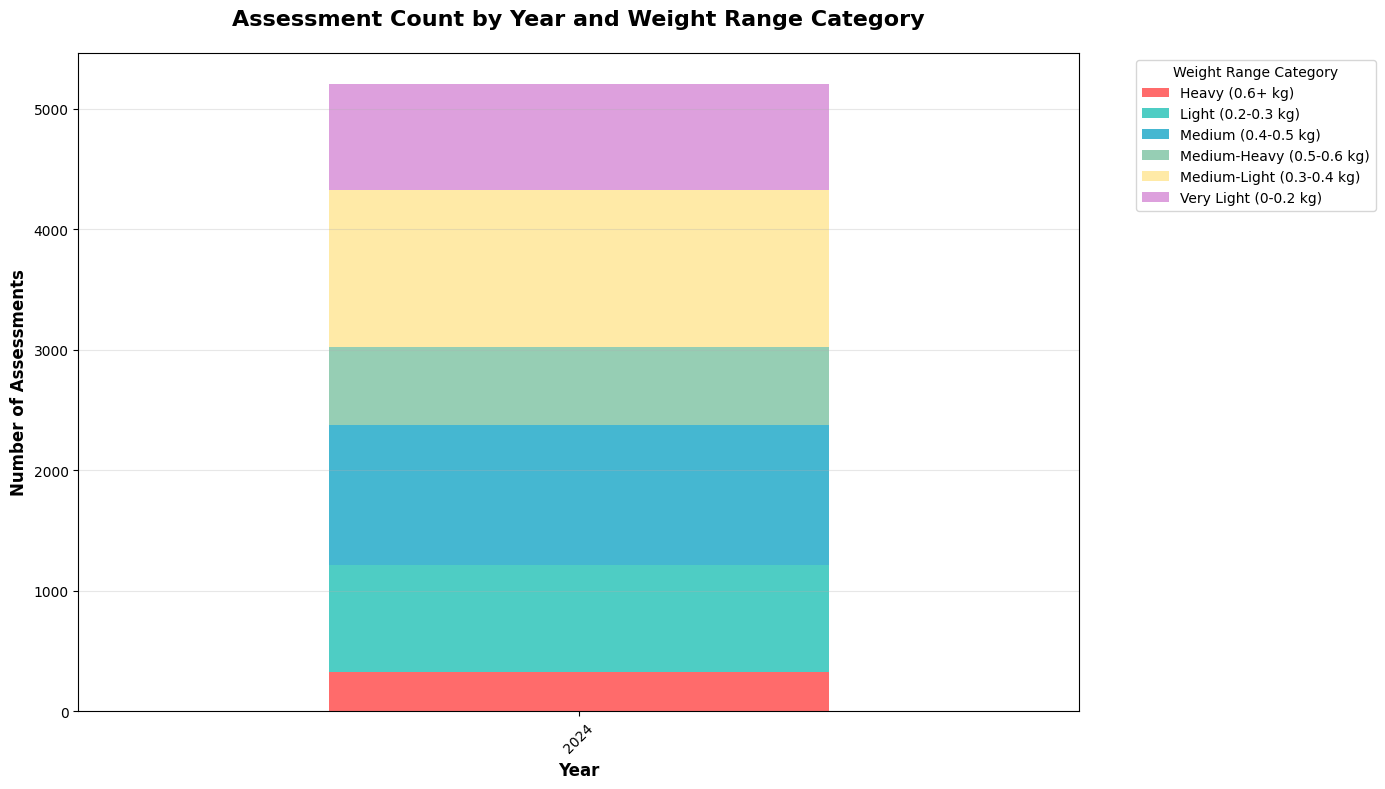


📋 Cross-tabulation of Assessments by Year and Weight Range:
weight_range_category  Heavy (0.6+ kg)  Light (0.2-0.3 kg)  \
year                                                         
2024                               321                 890   

weight_range_category  Medium (0.4-0.5 kg)  Medium-Heavy (0.5-0.6 kg)  \
year                                                                    
2024                                  1167                        642   

weight_range_category  Medium-Light (0.3-0.4 kg)  Very Light (0-0.2 kg)  
year                                                                     
2024                                        1304                    879  

📊 Summary:
   • Total assessments: 5203
   • Years covered: 1
   • Weight categories: 6

📅 Assessments by Year:
   • 2024: 5203 assessments (100.0%)

⚖️ Assessments by Weight Category:
   • Heavy (0.6+ kg): 321 assessments (6.2%)
   • Light (0.2-0.3 kg): 890 assessments (17.1%)
   • Medium (0.4-0.5 kg): 1167

In [20]:
# Create bar chart showing assessments by year and weight range category
print("📊 Creating bar chart: Assessments by Year and Weight Range Category...")

import matplotlib.pyplot as plt
import seaborn as sns

if 'df_results' in locals() and not df_results.empty:
    # Use data without outliers if energy_outlier column exists
    if 'energy_outlier' in df_results.columns:
        # Filter out energy outliers
        non_outlier_mask = df_results['energy_outlier'] != True
        df_chart = df_results[non_outlier_mask].copy()
        print(f"✅ Using data excluding energy outliers ({len(df_chart)} assessments)")
    else:
        df_chart = df_results.copy()
        print(f"✅ Using all data ({len(df_chart)} assessments)")
    
    # Extract year from rfi_pid column
    if 'rfi_pid' in df_chart.columns:
        # Extract year from rfi_pid (assuming format like 'fem2024', 'fem2023', etc.)
        df_chart['year'] = df_chart['rfi_pid'].str.extract(r'(\d{4})')[0].astype(int)
        print(f"✅ Extracted year from rfi_pid column")
        print(f"📅 Years found: {sorted(df_chart['year'].unique())}")
    else:
        print("⚠️ Warning: rfi_pid column not found. Using placeholder year 2024.")
        df_chart['year'] = 2024
    
    # Create the cross-tabulation using the filtered data
    crosstab = pd.crosstab(df_chart['year'], df_chart['weight_range_category'])
    
    # Create the bar chart
    plt.figure(figsize=(14, 8))
    
    # Use seaborn for better styling
    crosstab.plot(kind='bar', stacked=True, figsize=(14, 8), 
                  color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8'])
    
    plt.title('Assessment Count by Year and Weight Range Category', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Year', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Assessments', fontsize=12, fontweight='bold')
    plt.legend(title='Weight Range Category', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.xticks(rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Show the chart
    plt.show()
    
    # Display the data table
    print(f"\n📋 Cross-tabulation of Assessments by Year and Weight Range:")
    print(crosstab)
    
    # Summary statistics
    print(f"\n📊 Summary:")
    print(f"   • Total assessments: {crosstab.sum().sum()}")
    print(f"   • Years covered: {len(crosstab.index)}")
    print(f"   • Weight categories: {len(crosstab.columns)}")
    
    # Show year distribution
    print(f"\n📅 Assessments by Year:")
    year_totals = crosstab.sum(axis=1)
    for year, count in year_totals.items():
        pct = (count / year_totals.sum()) * 100
        print(f"   • {year}: {count} assessments ({pct:.1f}%)")
    
    # Show weight category distribution
    print(f"\n⚖️ Assessments by Weight Category:")
    category_totals = crosstab.sum(axis=0)
    for category, count in category_totals.items():
        pct = (count / category_totals.sum()) * 100
        print(f"   • {category}: {count} assessments ({pct:.1f}%)")
    
else:
    print("❌ No results data available. Run the previous cells first to load the data.")


📊 Creating grouped bar chart: Assessments by Weight Range Category and Year...
✅ Using data excluding energy outliers (5203 assessments)
✅ Extracted year from rfi_pid column
📅 Years found: [np.int64(2024)]


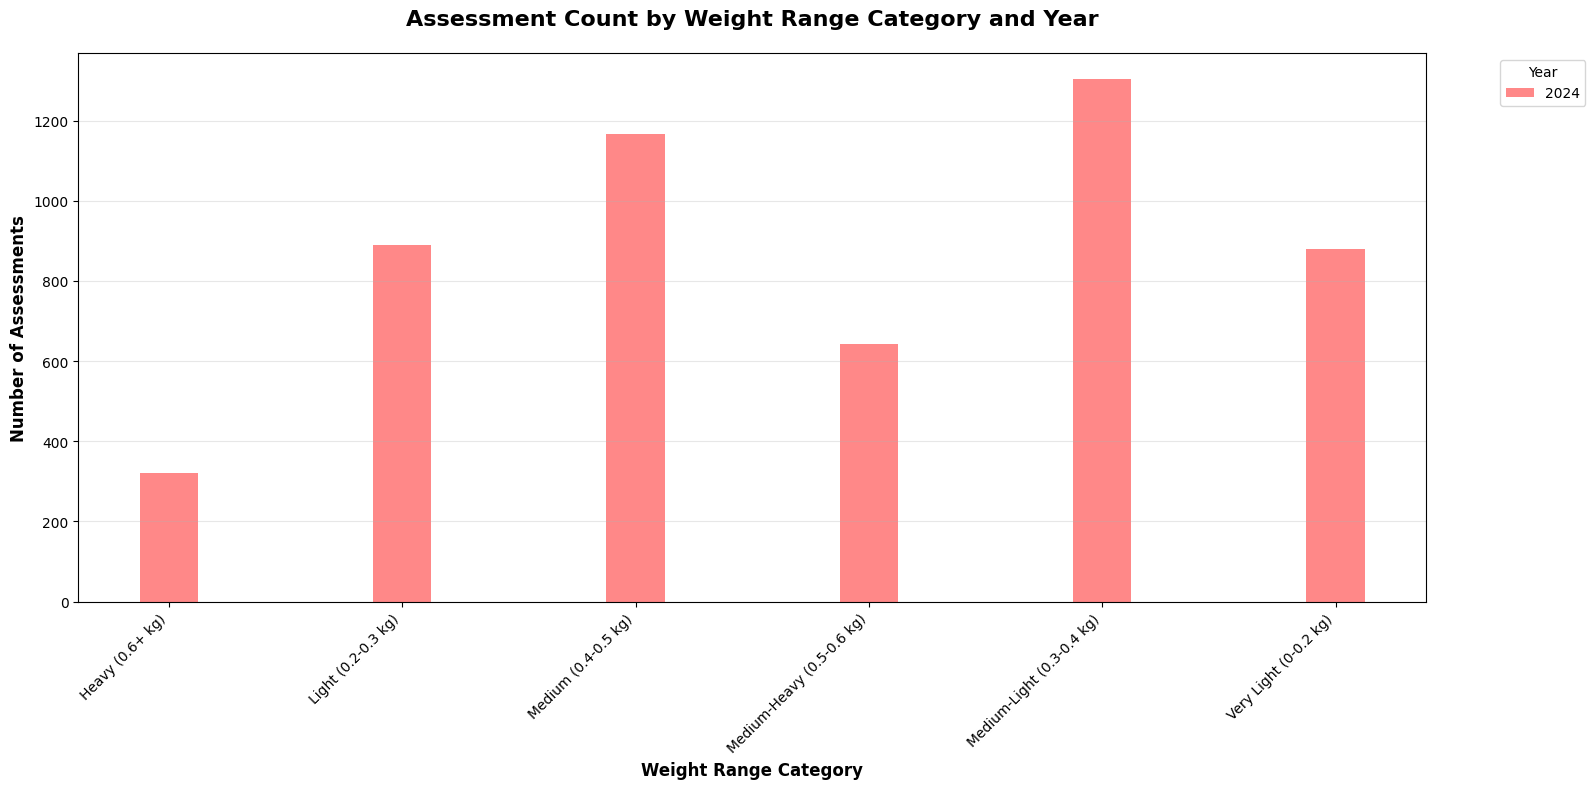


📋 Cross-tabulation of Assessments by Year and Weight Range:
weight_range_category  Heavy (0.6+ kg)  Light (0.2-0.3 kg)  \
year                                                         
2024                               321                 890   

weight_range_category  Medium (0.4-0.5 kg)  Medium-Heavy (0.5-0.6 kg)  \
year                                                                    
2024                                  1167                        642   

weight_range_category  Medium-Light (0.3-0.4 kg)  Very Light (0-0.2 kg)  
year                                                                     
2024                                        1304                    879  

📊 Summary:
   • Total assessments: 5203
   • Years covered: 1
   • Weight categories: 6

📅 Assessments by Year:
   • 2024: 5203 assessments (100.0%)

⚖️ Assessments by Weight Category:
   • Heavy (0.6+ kg): 321 assessments (6.2%)
   • Light (0.2-0.3 kg): 890 assessments (17.1%)
   • Medium (0.4-0.5 kg): 1167

In [21]:
# Create grouped bar chart showing assessments by weight range category and year
print("📊 Creating grouped bar chart: Assessments by Weight Range Category and Year...")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'df_results' in locals() and not df_results.empty:
    # Use data without outliers if energy_outlier column exists
    if 'energy_outlier' in df_results.columns:
        # Filter out energy outliers
        non_outlier_mask = df_results['energy_outlier'] != True
        df_chart = df_results[non_outlier_mask].copy()
        print(f"✅ Using data excluding energy outliers ({len(df_chart)} assessments)")
    else:
        df_chart = df_results.copy()
        print(f"✅ Using all data ({len(df_chart)} assessments)")
    
    # Extract year from rfi_pid column
    if 'rfi_pid' in df_chart.columns:
        # Extract year from rfi_pid (assuming format like 'fem2024', 'fem2023', etc.)
        df_chart['year'] = df_chart['rfi_pid'].str.extract(r'(\d{4})')[0].astype(int)
        print(f"✅ Extracted year from rfi_pid column")
        print(f"📅 Years found: {sorted(df_chart['year'].unique())}")
    else:
        print("⚠️ Warning: rfi_pid column not found. Using placeholder year 2024.")
        df_chart['year'] = 2024
    
    # Create the cross-tabulation using the filtered data
    crosstab = pd.crosstab(df_chart['year'], df_chart['weight_range_category'])
    
    # Create the grouped bar chart
    plt.figure(figsize=(16, 8))
    
    # Define colors for each year
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD', '#98D8C8']
    
    # Get the data for plotting
    years = crosstab.index
    categories = crosstab.columns
    
    # Set up the bar positions
    x = np.arange(len(categories))
    width = 0.25  # Width of each bar
    
    # Create bars for each year
    for i, year in enumerate(years):
        offset = (i - len(years)/2 + 0.5) * width
        plt.bar(x + offset, crosstab.loc[year], width, 
                label=f'{year}', color=colors[i % len(colors)], alpha=0.8)
    
    # Customize the chart
    plt.title('Assessment Count by Weight Range Category and Year', fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Weight Range Category', fontsize=12, fontweight='bold')
    plt.ylabel('Number of Assessments', fontsize=12, fontweight='bold')
    plt.xticks(x, categories, rotation=45, ha='right')
    plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Show the chart
    plt.show()
    
    # Display the data table
    print(f"\n📋 Cross-tabulation of Assessments by Year and Weight Range:")
    print(crosstab)
    
    # Summary statistics
    print(f"\n📊 Summary:")
    print(f"   • Total assessments: {crosstab.sum().sum()}")
    print(f"   • Years covered: {len(crosstab.index)}")
    print(f"   • Weight categories: {len(crosstab.columns)}")
    
    # Show year distribution
    print(f"\n📅 Assessments by Year:")
    year_totals = crosstab.sum(axis=1)
    for year, count in year_totals.items():
        pct = (count / year_totals.sum()) * 100
        print(f"   • {year}: {count} assessments ({pct:.1f}%)")
    
    # Show weight category distribution
    print(f"\n⚖️ Assessments by Weight Category:")
    category_totals = crosstab.sum(axis=0)
    for category, count in category_totals.items():
        pct = (count / category_totals.sum()) * 100
        print(f"   • {category}: {count} assessments ({pct:.1f}%)")
    
else:
    print("❌ No results data available. Run the previous cells first to load the data.")


📊 Creating box and whisker plot: Assumed Average Product Weight Distribution by Category...
✅ Using data excluding energy outliers (5203 assessments)


/var/folders/4p/hw_yv2nj35x1hwdx4p7b3ftm0000gp/T/ipykernel_62442/1439975984.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


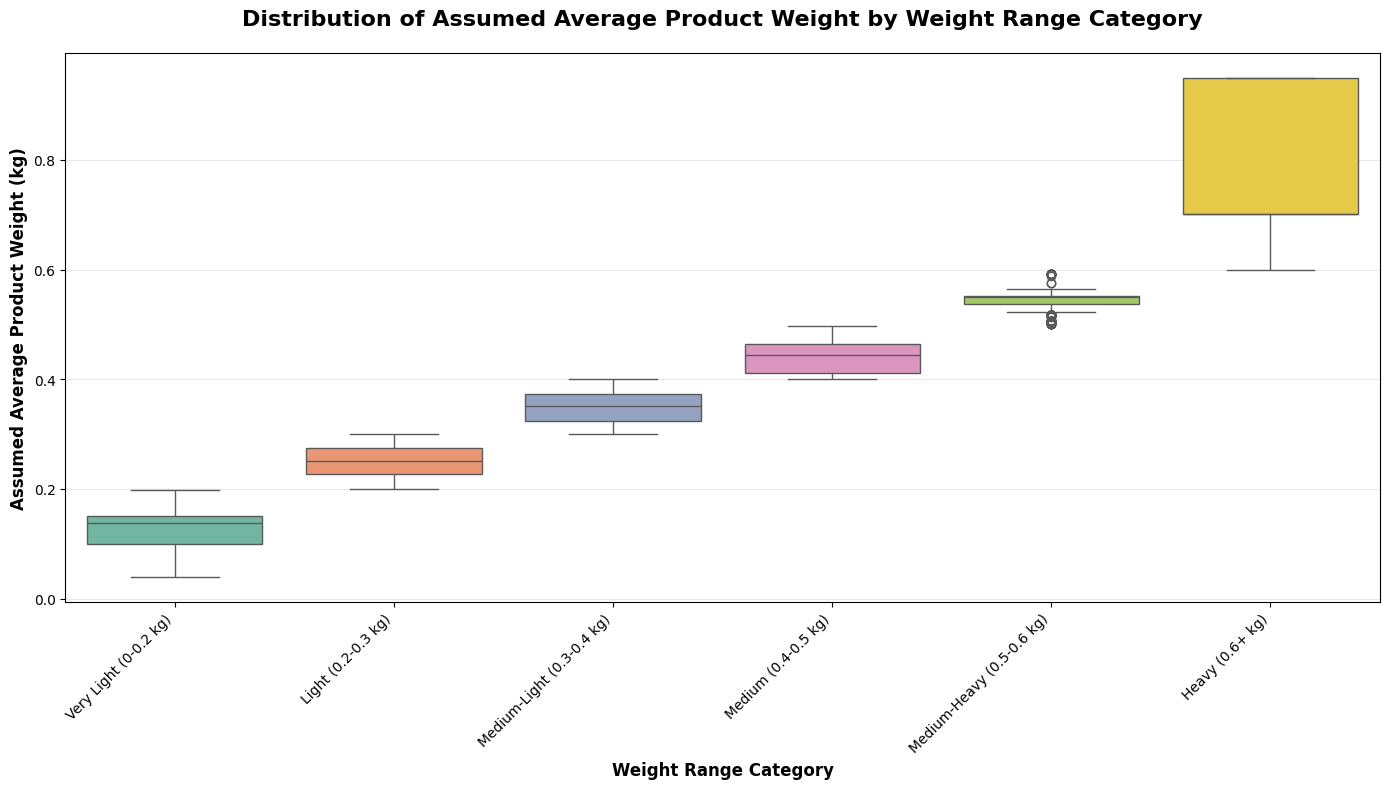


📊 Summary Statistics by Weight Range Category:

Very Light (0-0.2 kg):
   • Count: 879
   • Mean: 0.1229 kg
   • Median: 0.1383 kg
   • Std Dev: 0.0495 kg
   • Min: 0.0400 kg
   • Max: 0.1986 kg
   • Q1 (25th percentile): 0.1000 kg
   • Q3 (75th percentile): 0.1500 kg
   • IQR (Q3-Q1): 0.0500 kg

Light (0.2-0.3 kg):
   • Count: 890
   • Mean: 0.2537 kg
   • Median: 0.2504 kg
   • Std Dev: 0.0256 kg
   • Min: 0.2000 kg
   • Max: 0.2997 kg
   • Q1 (25th percentile): 0.2281 kg
   • Q3 (75th percentile): 0.2751 kg
   • IQR (Q3-Q1): 0.0469 kg

Medium-Light (0.3-0.4 kg):
   • Count: 1304
   • Mean: 0.3479 kg
   • Median: 0.3508 kg
   • Std Dev: 0.0283 kg
   • Min: 0.3006 kg
   • Max: 0.4000 kg
   • Q1 (25th percentile): 0.3241 kg
   • Q3 (75th percentile): 0.3727 kg
   • IQR (Q3-Q1): 0.0486 kg

Medium (0.4-0.5 kg):
   • Count: 1167
   • Mean: 0.4405 kg
   • Median: 0.4451 kg
   • Std Dev: 0.0247 kg
   • Min: 0.4008 kg
   • Max: 0.4968 kg
   • Q1 (25th percentile): 0.4124 kg
   • Q3 (75th pe

In [22]:
# Create box and whisker plot for assumed_avg_product_weight_kg by weight category
print("📊 Creating box and whisker plot: Assumed Average Product Weight Distribution by Category...")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

if 'df_results' in locals() and not df_results.empty:
    # Use data without outliers if energy_outlier column exists
    if 'energy_outlier' in df_results.columns:
        # Filter out energy outliers
        non_outlier_mask = df_results['energy_outlier'] != True
        df_chart = df_results[non_outlier_mask].copy()
        print(f"✅ Using data excluding energy outliers ({len(df_chart)} assessments)")
    else:
        df_chart = df_results.copy()
        print(f"✅ Using all data ({len(df_chart)} assessments)")
    
    # Create the box plot
    plt.figure(figsize=(14, 8))
    
    # Define the order of weight categories for consistent plotting
    category_order = [
        "Very Light (0-0.2 kg)",
        "Light (0.2-0.3 kg)", 
        "Medium-Light (0.3-0.4 kg)",
        "Medium (0.4-0.5 kg)",
        "Medium-Heavy (0.5-0.6 kg)",
        "Heavy (0.6+ kg)"
    ]
    
    # Filter out 'Unknown' category if it exists
    df_plot = df_chart[df_chart['weight_range_category'].isin(category_order)].copy()
    
    # Create the box plot using seaborn for better styling
    sns.boxplot(
        data=df_plot, 
        x='weight_range_category', 
        y='assumed_avg_product_weight_kg',
        order=category_order,
        palette='Set2',
        showfliers=True  # Show outliers
    )
    
    # Customize the plot
    plt.title('Distribution of Assumed Average Product Weight by Weight Range Category', 
              fontsize=16, fontweight='bold', pad=20)
    plt.xlabel('Weight Range Category', fontsize=12, fontweight='bold')
    plt.ylabel('Assumed Average Product Weight (kg)', fontsize=12, fontweight='bold')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    
    # Show the plot
    plt.show()
    
    # Display summary statistics for each category
    print(f"\n📊 Summary Statistics by Weight Range Category:")
    print("=" * 80)
    
    for category in category_order:
        category_data = df_plot[df_plot['weight_range_category'] == category]['assumed_avg_product_weight_kg']
        if len(category_data) > 0:
            print(f"\n{category}:")
            print(f"   • Count: {len(category_data)}")
            print(f"   • Mean: {category_data.mean():.4f} kg")
            print(f"   • Median: {category_data.median():.4f} kg")
            print(f"   • Std Dev: {category_data.std():.4f} kg")
            print(f"   • Min: {category_data.min():.4f} kg")
            print(f"   • Max: {category_data.max():.4f} kg")
            print(f"   • Q1 (25th percentile): {category_data.quantile(0.25):.4f} kg")
            print(f"   • Q3 (75th percentile): {category_data.quantile(0.75):.4f} kg")
            print(f"   • IQR (Q3-Q1): {category_data.quantile(0.75) - category_data.quantile(0.25):.4f} kg")
        else:
            print(f"\n{category}: No data available")
    
    # Overall statistics
    print(f"\n📈 Overall Statistics:")
    print(f"   • Total assessments: {len(df_plot)}")
    print(f"   • Overall mean weight: {df_plot['assumed_avg_product_weight_kg'].mean():.4f} kg")
    print(f"   • Overall median weight: {df_plot['assumed_avg_product_weight_kg'].median():.4f} kg")
    print(f"   • Overall std deviation: {df_plot['assumed_avg_product_weight_kg'].std():.4f} kg")
    print(f"   • Weight range: {df_plot['assumed_avg_product_weight_kg'].min():.4f} - {df_plot['assumed_avg_product_weight_kg'].max():.4f} kg")
    
    # Check for potential misclassifications (weights outside their category ranges)
    print(f"\n🔍 Potential Misclassifications:")
    misclassifications = []
    for category in category_order:
        category_data = df_plot[df_plot['weight_range_category'] == category]['assumed_avg_product_weight_kg']
        if len(category_data) > 0:
            # Extract the range from category name
            if "Very Light" in category:
                min_val, max_val = 0, 0.2
            elif "Light" in category:
                min_val, max_val = 0.2, 0.3
            elif "Medium-Light" in category:
                min_val, max_val = 0.3, 0.4
            elif "Medium" in category:
                min_val, max_val = 0.4, 0.5
            elif "Medium-Heavy" in category:
                min_val, max_val = 0.5, 0.6
            elif "Heavy" in category:
                min_val, max_val = 0.6, float('inf')
            
            # Find values outside the expected range
            if max_val == float('inf'):
                outliers = category_data[category_data < min_val]
            else:
                outliers = category_data[(category_data < min_val) | (category_data > max_val)]
            
            if len(outliers) > 0:
                misclassifications.append(f"{category}: {len(outliers)} values outside range")
                print(f"   • {category}: {len(outliers)} values outside expected range")
    
    if not misclassifications:
        print("   • No misclassifications detected - all values are within their expected ranges")
    
else:
    print("❌ No results data available. Run the previous cells first to load the data.")
